Gráfico 'grafico_distorsion_cmb.png' guardado.


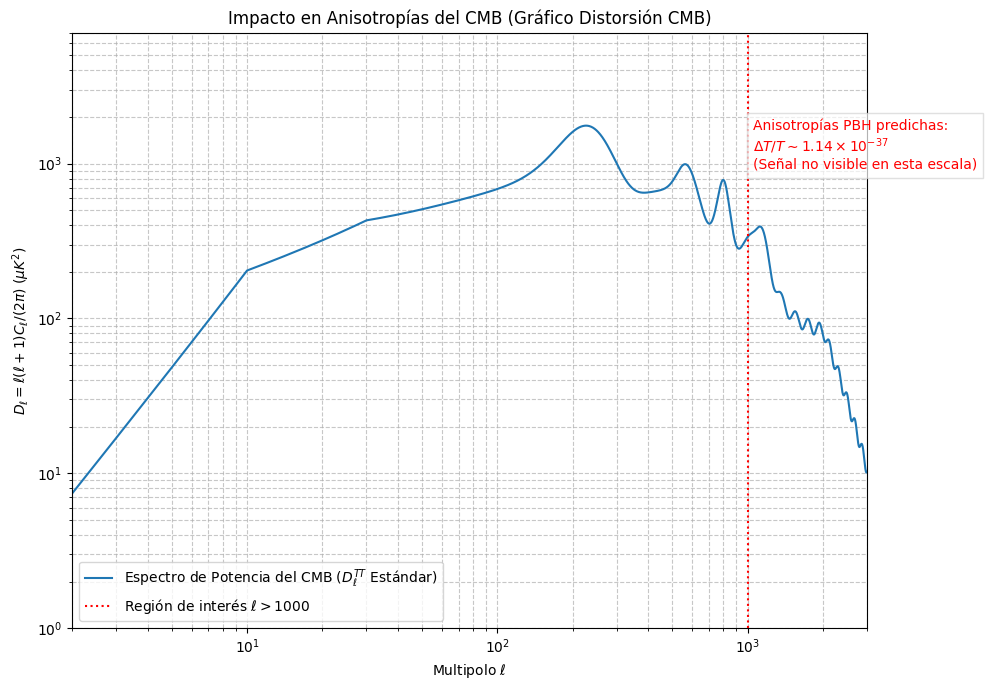

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

def generar_datos_cmb_conceptual(l_max=3000):
    ell = np.arange(2, l_max + 1)
    Dl_cmb = ( (1500 / (1 + ((ell - 220)/100)**2)) + \
               (800 / (1 + ((ell - 550)/80)**2)) + \
               (500 / (1 + ((ell - 800)/60)**2)) + \
               (300 / (1 + ((ell - 1100)/100)**2)) + \
               (ell/50)**0.1 * 50 ) * (1 + 0.1 * np.sin(ell / 30))
    Dl_cmb = np.clip(Dl_cmb, 10, 6000)
    Dl_cmb[ell < 30] = Dl_cmb[ell < 30] * (ell[ell < 30]/30)**0.5
    Dl_cmb[ell < 10] = Dl_cmb[ell < 10] * (ell[ell < 10]/10)**1.5
    Dl_cmb[ell > 2000] = Dl_cmb[ell > 2000] * np.exp(-(ell[ell > 2000]-2000)/500)
    return ell, Dl_cmb

def plot_distorsion_cmb(ell, Dl_cmb):
    plt.figure(figsize=(10, 7))
    plt.plot(ell, Dl_cmb, label="Espectro de Potencia del CMB ($D_\\ell^{TT}$ Estándar)")
    plt.axvline(1000, color='r', linestyle=':', linewidth=1.5, label="Región de interés $\\ell > 1000$")
    plt.text(1050, plt.ylim()[1]*0.5, 
             "Anisotropías PBH predichas:\n$\\Delta T/T \\sim 1.14 \\times 10^{-37}$\n(Señal no visible en esta escala)", 
             color='red', ha='left', fontsize=10,
             bbox=dict(facecolor='white', alpha=0.7, edgecolor='lightgray'))
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel("Multipolo $\\ell$")
    plt.ylabel("$D_\\ell = \\ell(\\ell+1)C_\\ell / (2\\pi)$ ($\\mu K^2$)")
    plt.title("Impacto en Anisotropías del CMB (Gráfico Distorsión CMB)")
    plt.xlim(2, 3000)
    plt.ylim(1, 7000)
    plt.grid(True, which="both", linestyle='--', alpha=0.7)
    plt.legend(loc="lower left")
    plt.tight_layout()
    plt.savefig("grafico_distorsion_cmb.png")
    print("Gráfico 'grafico_distorsion_cmb.png' guardado.")

if __name__ == "__main__":
    ell_vals, Dl_vals = generar_datos_cmb_conceptual()
    plot_distorsion_cmb(ell_vals, Dl_vals)